#### TASK 4

Develop a hand gesture recognition model that can accuratly 
identify and classify hand guesture from image or video 
data,enabling intuitive human-computer interaction and
gesture based control systems.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os 
import cv2 
import numpy as np

from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [10]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = "./Dataset/leapGestRecog/leapGestRecog/"

In [11]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

In [17]:
import random
random.shuffle(image_data)

In [18]:
features = []
labels = []

for feature,label in image_data:
    features.append(feature)
    labels.append(label)

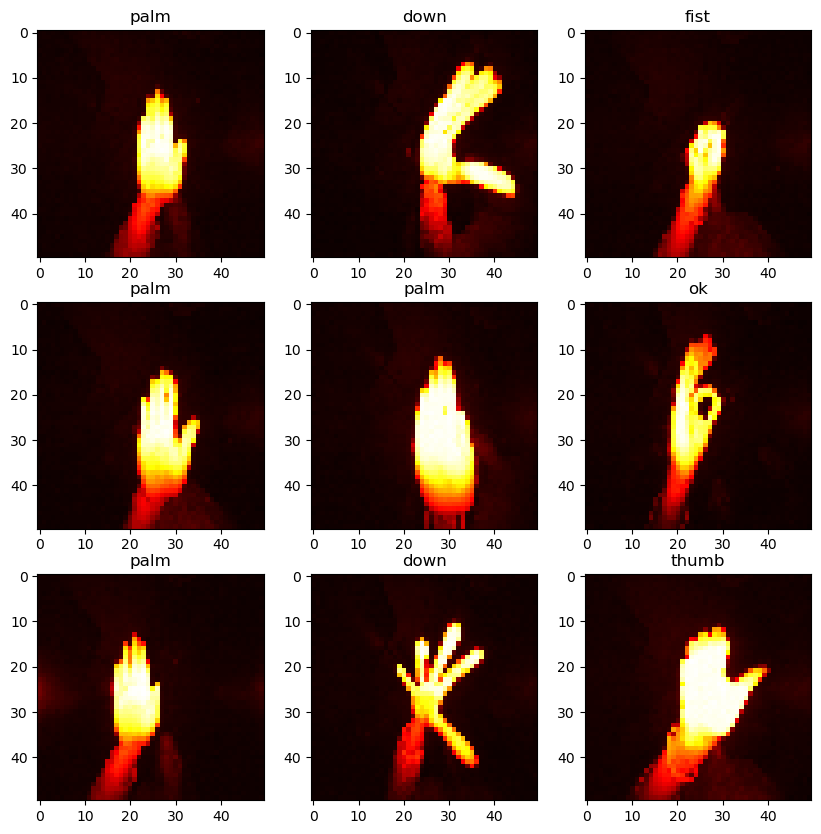

In [25]:
plt.figure(1,figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0],cmap='hot')
    plt.title(CATEGORIES[labels[i]][3:])
plt.show()

In [37]:
features = np.array(features)
labels = np.array(labels)
input_data = features/255

In [38]:
input_data.shape

(20000, 50, 50)

In [41]:
labels = keras.utils.to_categorical(labels,num_classes=10,dtype='i1')

In [43]:
labels[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [44]:
input_data.shape = (-1,IMG_SIZE,IMG_SIZE)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = features
y = labels

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

# Model 

In [51]:
model = keras.models.Sequential()


model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))    


In [52]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=7,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/7
469/469 [==============================] - 70s 142ms/step - loss: 0.7105 - accuracy: 0.9043 - val_loss: 0.0085 - val_accuracy: 0.9976
Epoch 2/7
469/469 [==============================] - 69s 146ms/step - loss: 0.0385 - accuracy: 0.9913 - val_loss: 0.0025 - val_accuracy: 0.9998
Epoch 3/7
469/469 [==============================] - 77s 164ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 4/7
469/469 [==============================] - 80s 170ms/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 5/7
469/469 [==============================] - 67s 144ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.0091 - val_accuracy: 0.9986
Epoch 6/7
469/469 [==============================] - 69s 146ms/step - loss: 0.0226 - accuracy: 0.9969 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 7/7
469/469 [==============================] - 74s 157ms/step - loss: 0.0136 - accuracy: 0.9979 - val_loss: 0.0043 - val_accuracy:

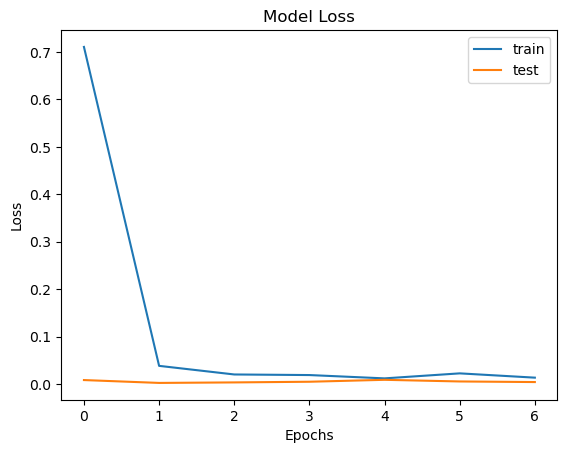

In [54]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

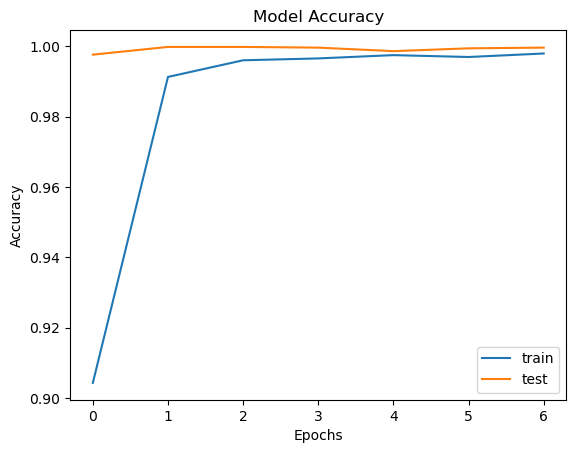

In [55]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

157/157 [==============================] - 3s 21ms/step - loss: 0.0043 - accuracy: 0.9996
Test accuracy: 99.96%


157/157 [==============================] - 4s 22ms/step


[]

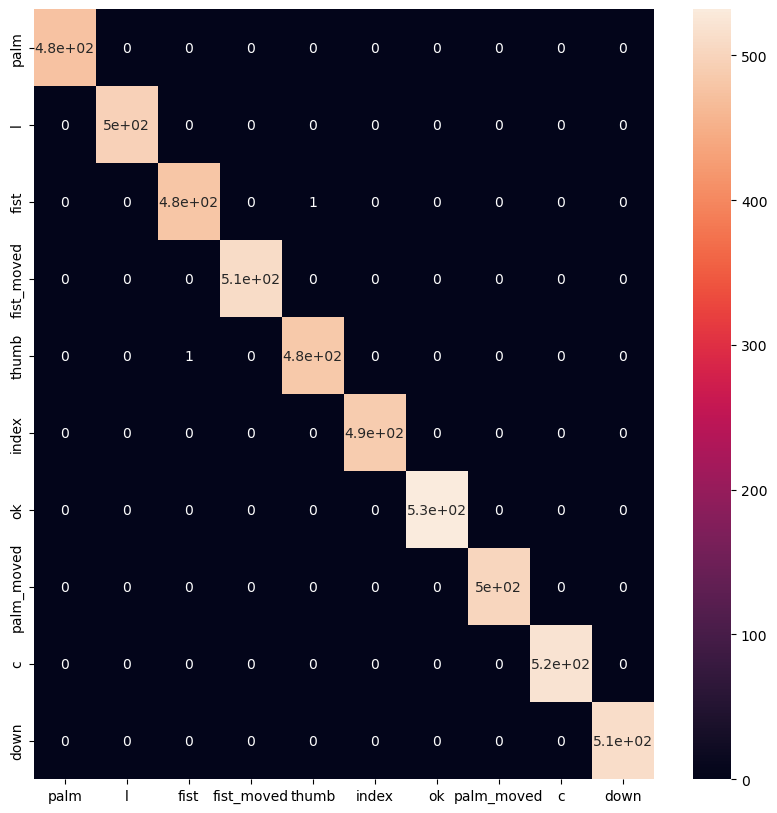

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()